# Exploration_SSAC 02

##### 필요한 모듈 import

In [63]:
# 데이터 로드 및 분리
from sklearn.datasets import load_digits # (1) 
from sklearn.datasets import load_wine # (2)
from sklearn.datasets import load_breast_cancer # (3)
from sklearn.model_selection import train_test_split

# sklearn 모델 활용
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

# 모델 평가
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

# 데이터 분석
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### (1) load_digits : 손글씨를 분류해 봅시다

* 데이터 로드 및 준비
* 데이터 분석(시각화, Pandas DataFrame으로 형식 체크)
* 데이터 분리
* sklearn 모델 활용(Decision Tree, Random Forest, SVM, SGD Classifier, Logistic Regression)
* 모델 평가 (평가 지표 정리)

##### 데이터 준비

In [4]:
digits = load_digits() # sklearn 내장 함수를 활용하여 손글씨 데이터 로드
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

이미지 데이터이기 때문에 array 형태로 출력

##### 데이터 분석

1. 데이터 정보

In [5]:
digits.keys()
# data :: == feature, x, 말 그대로 데이터
# target :: == label, y, 데이터에 부합하는 정답지
# target_names :: 정답지 종류
# images :: 이미지를 담고 있는 것 같은데, data랑 같은 형태로 출력됨, 아마 matplotlib를 활용하여 볼 수 있을듯
# DESCR :: description 데이터에 대한 설명을 담고 있음

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

* 참고
* Difference between images and data in sklearn load_digits dataset
:: In term of features, there is no differences between digits.data and digits.images. Both contain the pixel values of some 8*8 images. The first is a (1797, 64) numpy.ndarray while the second is a (1797, 8, 8) numpy.ndarray. The only difference is that digits.images[i] is an 8*8 reshape of digits.data[i] which is more suitable for visualization.

즉, 기능 측면에서는 key의 data 와 images는 차이가 없는 것이 맞고, 
두 가지 모두 픽셀 값을 담고 있으며, 8X8로 표현을 했냐, 픽셀 64로 표현의 했냐의 차이인가보다

In [15]:
digits_data = digits.data # 손글씨 데이터를 구성하는 찐 데이터 (이미지->픽셀화) 
digits_data # 모델 학습에 필요한 data와 target은 사용하기 좋게 변수에 할당!

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [9]:
digits.data.shape # 총 1797장이며, 한 장당 64픽셀, 즉 8X8 이미지 크기로 구성

(1797, 64)

In [10]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [16]:
digits_label = digits.target # target, label 각 data, 즉 이미지에 맞는 정답이 담겨 있음
digits_label # 모델 학습에 필요한 data와 target은 사용하기 좋게 변수에 할당!

array([0, 1, 2, ..., 8, 9, 8])

In [11]:
digits.target_names # 중복을 제거한 target, label의 구성 :: 0~9까지의 손글씨로 구성된 것을 알 수 있음

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [14]:
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

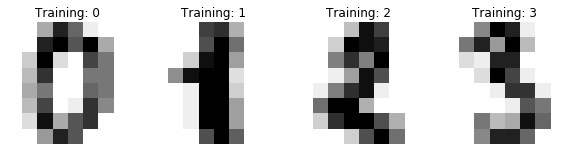

In [21]:
# 구글의 힘을 빌려 이미지 생성 plt의 세계...
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

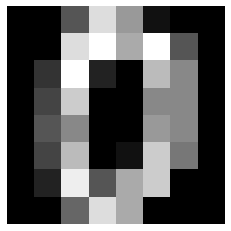

In [23]:
%matplotlib inline

plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

In [43]:
# plt.subplot의 파라미터 구성이 궁금하고, 항상 헷갈려서 기록!
?plt.subplot
'''
Call signatures::

   subplot(nrows, ncols, index, **kwargs) # plt.subplot(2:nrows, 5:ncols, i+1:index)
   --> 2행과 5열로 구성하고, 원래 파이썬에서 인덱스는 0부터 시작하니깐 +1을 하여 표현하라
   subplot(pos, **kwargs)
   subplot(ax)
'''

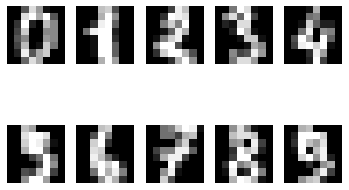

In [24]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray') # array type으로 되어 있기 때문에 다시 이미지 픽셀 형태로 reshape
    plt.axis('off')
plt.show()

In [22]:
digits.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

##### 데이터 분리

In [44]:
?train_test_split
'''
data / label 을 각각 test_size(0~1 사이로 지정), random_state(default=None)에 맞게
분리하여 각 변수에 할당해줌
'''

In [27]:
X_train, X_test, y_train, y_test = train_test_split(digits_data, digits_label, test_size=0.2, random_state=7)

In [28]:
X_train.shape

(1437, 64)

In [29]:
X_test.shape

(360, 64)

In [30]:
y_train.shape

(1437,)

In [31]:
y_train

array([2, 2, 2, ..., 1, 3, 3])

In [32]:
y_test # random_state 파마미터를 설정했기 때문에, 순차적으로 분리된 것이 아닌 제대로 섞임

array([6, 0, 5, 9, 2, 9, 0, 4, 1, 0, 1, 8, 2, 5, 2, 8, 1, 8, 9, 1, 0, 2,
       0, 4, 5, 3, 3, 0, 0, 4, 1, 4, 4, 4, 6, 1, 4, 0, 6, 6, 0, 9, 3, 6,
       6, 2, 0, 1, 9, 6, 2, 8, 9, 9, 0, 2, 0, 8, 4, 6, 8, 5, 8, 7, 8, 7,
       7, 4, 1, 4, 5, 5, 4, 6, 2, 0, 1, 3, 7, 5, 8, 2, 4, 4, 2, 5, 1, 9,
       3, 7, 6, 3, 3, 5, 6, 2, 1, 0, 1, 9, 4, 1, 1, 3, 1, 6, 9, 0, 3, 7,
       6, 9, 3, 8, 0, 8, 3, 8, 8, 6, 3, 7, 3, 9, 0, 3, 0, 9, 8, 1, 2, 2,
       3, 6, 9, 4, 0, 5, 4, 2, 9, 1, 0, 2, 5, 0, 2, 2, 7, 4, 6, 9, 8, 2,
       6, 0, 4, 4, 8, 5, 0, 2, 4, 6, 8, 2, 3, 7, 2, 9, 0, 3, 5, 9, 1, 6,
       8, 7, 5, 3, 0, 4, 2, 1, 3, 3, 6, 0, 2, 8, 4, 1, 4, 7, 5, 7, 6, 6,
       8, 1, 0, 6, 8, 7, 1, 1, 9, 8, 5, 5, 3, 6, 8, 1, 2, 0, 7, 5, 3, 0,
       8, 2, 0, 4, 0, 9, 4, 8, 4, 7, 9, 7, 3, 6, 2, 5, 1, 5, 9, 2, 9, 9,
       8, 2, 1, 6, 7, 1, 7, 5, 7, 8, 9, 5, 7, 4, 3, 7, 8, 8, 2, 8, 9, 5,
       3, 2, 8, 0, 4, 2, 1, 0, 8, 4, 1, 7, 1, 4, 7, 7, 1, 8, 3, 8, 4, 3,
       5, 9, 4, 4, 8, 1, 8, 7, 2, 3, 1, 1, 1, 0, 2,

##### sklearn 모델 활용 (학습 및 예측)
* Decision Tree, Random Forest, SVM, SGD Classifier, Logistic Regression
* 공통적으로 fit (학습) , predict (예측) 메서드 사용!

1) Decision Tree

In [55]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train) # 학습 데이터를 활용하여 fit 학습
y_pred = decision_tree.predict(X_test) # 학습된 모델을 X_test 데이터로 예측하여 변수 할당

print(classification_report(y_test, y_pred)) # 평가지표 :: 실제 정답과 모델을 통해 예측한 값이 얼마나 잘 맞는지 확인

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        36
           1       0.70      0.89      0.78        36
           2       0.87      0.82      0.84        33
           3       0.91      0.80      0.85        40
           4       0.77      0.82      0.80        40
           5       0.91      0.84      0.87        37
           6       0.94      0.86      0.90        35
           7       1.00      0.79      0.88        38
           8       0.66      0.81      0.72        31
           9       0.83      0.85      0.84        34

    accuracy                           0.84       360
   macro avg       0.85      0.84      0.84       360
weighted avg       0.86      0.84      0.84       360



In [56]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8416666666666667

In [57]:
confusion_matrix(y_test, y_pred)

array([[34,  0,  0,  0,  1,  0,  0,  0,  1,  0],
       [ 0, 32,  0,  0,  1,  0,  0,  0,  1,  2],
       [ 0,  3, 27,  0,  0,  0,  0,  0,  2,  1],
       [ 0,  0,  0, 32,  0,  1,  0,  0,  6,  1],
       [ 0,  6,  0,  0, 33,  0,  0,  0,  1,  0],
       [ 1,  1,  1,  0,  0, 31,  1,  0,  1,  1],
       [ 0,  0,  0,  0,  4,  1, 30,  0,  0,  0],
       [ 0,  0,  3,  1,  1,  0,  1, 30,  1,  1],
       [ 0,  3,  0,  1,  1,  1,  0,  0, 25,  0],
       [ 1,  1,  0,  1,  2,  0,  0,  0,  0, 29]])

2) Random Forest

In [53]:
X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=25)

random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred)) # 평가지표

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      1.00      0.97        36
           2       1.00      1.00      1.00        33
           3       1.00      0.93      0.96        40
           4       0.97      0.97      0.97        40
           5       0.97      0.97      0.97        37
           6       1.00      0.94      0.97        35
           7       0.95      0.95      0.95        38
           8       0.86      0.97      0.91        31
           9       0.97      0.94      0.96        34

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



3) SVM Model

In [37]:
svm_model = svm.SVC()

In [38]:
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred)) # 평가지표

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        36
           2       0.97      1.00      0.99        33
           3       1.00      0.97      0.99        40
           4       1.00      1.00      1.00        40
           5       1.00      0.97      0.99        37
           6       1.00      1.00      1.00        35
           7       1.00      0.97      0.99        38
           8       0.94      1.00      0.97        31
           9       0.94      0.94      0.94        34

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



4) SGD Classifier

In [39]:
sgd_model = SGDClassifier()

In [40]:
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred)) # 평가지표

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.97      0.81      0.88        36
           2       1.00      1.00      1.00        33
           3       0.97      0.95      0.96        40
           4       0.98      1.00      0.99        40
           5       1.00      0.95      0.97        37
           6       1.00      0.91      0.96        35
           7       1.00      0.92      0.96        38
           8       0.58      0.97      0.72        31
           9       0.96      0.76      0.85        34

    accuracy                           0.93       360
   macro avg       0.95      0.93      0.93       360
weighted avg       0.95      0.93      0.93       360



5) Logistic Regression

In [41]:
logistic_model = LogisticRegression()

In [42]:
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred)) # 평가지표

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      1.00      0.97        36
           2       1.00      0.97      0.98        33
           3       1.00      0.97      0.99        40
           4       1.00      0.97      0.99        40
           5       0.95      0.95      0.95        37
           6       1.00      0.94      0.97        35
           7       1.00      0.87      0.93        38
           8       0.88      0.97      0.92        31
           9       0.85      0.97      0.90        34

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



/home/ssac22/Downloads/exit/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


logistic_model 에서 warning이 떴음

### Result of first Project

결과적으로, **SVM(Supprot Vector Machine)** 이 정확도 99로 가장 높은 정확도를 보이는 모델이 되었고, 

Digits 데이터의 경우, 각 모델별 평가 지표 (precision, recall, f1-score)가 같은 값을 도출해 내었기 때문에,  
수치적으로는 비교가 되지 않고 특성별로 분석하여 도출하여 보기로 했다.  

손글씨 데이터의 경우, 활용도에 따라 다르겠지만 '분류'에 초점을 맞추어 정확한 분류가 중요하기 때문에 f1-score 지표로 판단하는 것이 좋다고 판단했다.  
만약, 손글씨 위조를 방지하기 위해서 데이터 셋을 사용한다면, 실제 위조 글씨를 판별하는 것이 중요하기 때문에  
실제 정답에 중점을 두어야 하여 **Precision 지표** 를 중점으로 평가하여야 한다고 생각한다.

### (2) load_wine : 와인을 분류해 봅시다

* 데이터 로드 및 준비
* 데이터 분석(시각화, Pandas DataFrame으로 형식 체크)
* 데이터 분리
* sklearn 모델 활용(Decision Tree, Random Forest, SVM, SGD Classifier, Logistic Regression)
* 모델 평가 (평가 지표 정리)

##### 데이터 준비

In [3]:
wine = load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [4]:
wine.keys() # 데이터를 구성하고 있는 내용의 큰 제목이라고 보면 됨.

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

##### 데이터 이해하기 (필요한 데이터 정리 단계) :: 데이터 / 라벨

In [6]:
wine_data = wine.data # feature / data / x 지정하기
wine_data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [8]:
wine_label = wine.target # target / label / y 지정하기
wine_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [9]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [10]:
wine.DESCR # wine recognition dataset

'.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:                     

In [13]:
wine_data.shape

(178, 13)

In [14]:
wine_label.shape

(178,)

##### 데이터 분석

In [17]:
wine.feature_names # 데이터 프레임의 컬럼명이 되는 13가지의 특징

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [18]:
len(wine.feature_names)

13

In [19]:
# 와인 등급에 영향을 미치는 특징 데이터를 가지고, 13가지 특징을 컬럼으로 데이터 프레임 생성
# 부동소수점으로 구성되어 있던 데이터들이 정리가 되어서 데이터 프레임으로 변한다
# :: why?
wine_df = pd.DataFrame(data=wine_data, columns=wine.feature_names)
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [20]:
wine_df['label'] = wine.target # 각 데이터에 맞는 정답지(label)을 데이터 프레임에 컬럼명 'label'로 추가
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [21]:
wine_df.head(5) # 데이터 프레임을 순차적 상단 5가지 데이터 뽑아줘 :: label 0인 5가지 데이터

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [22]:
wine_df.tail() # 데이터 프레임을 마지막 5가지 데이터 뽑아줘 :: label 2인 5가지 데이터

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,2


In [23]:
wine_df.describe

<bound method NDFrame.describe of      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  

##### 데이터 분리

In [26]:
# 총 178개의 데이터를 2:8로 분리
X_train, X_test, y_train, y_test = train_test_split(wine_data,
                                                    wine_label,
                                                    test_size=0.2,
                                                    random_state=7)

print('X_train 개수 :', len(X_train), '','X_test 개수 :', len(X_test))
print('y_train 개수 :', len(y_train), '','y_test 개수 :', len(y_test))

X_train 개수 : 142  X_test 개수 : 36
y_train 개수 : 142  y_test 개수 : 36


In [27]:
# train data의 데이터와 라벨의 데이터 형태
X_train.shape, y_train.shape

((142, 13), (142,))

##### sklearn 모델 활용 (학습 및 예측)
* Decision Tree, Random Forest, SVM, SGD Classifier, Logistic Regression
* 공통적으로 fit (학습) , predict (예측) 메서드 사용!

1) Decision Tree

In [28]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train) # 학습 데이터를 활용하여 fit 학습
y_pred = decision_tree.predict(X_test) # 학습된 모델을 X_test 데이터로 예측하여 변수 할당

print(classification_report(y_test, y_pred)) # 평가지표 :: 실제 정답과 모델을 통해 예측한 값이 얼마나 잘 맞는지 확인

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.89      0.94      0.91        17
           2       1.00      0.83      0.91        12

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



2) Random Forest  

In [29]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred)) # 평가지표

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



3) SVM

In [30]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred)) # 평가지표

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.58      0.88      0.70        17
           2       0.33      0.08      0.13        12

    accuracy                           0.61        36
   macro avg       0.59      0.61      0.56        36
weighted avg       0.55      0.61      0.54        36



4) SGD Classifier

In [31]:
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred)) # 평가지표

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.55      0.94      0.70        17
           2       0.00      0.00      0.00        12

    accuracy                           0.61        36
   macro avg       0.47      0.60      0.52        36
weighted avg       0.43      0.61      0.50        36



/home/ssac22/Downloads/exit/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5) Logistic Regression

In [32]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred)) # 평가지표

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.94      1.00      0.97        17
           2       1.00      1.00      1.00        12

    accuracy                           0.97        36
   macro avg       0.98      0.95      0.96        36
weighted avg       0.97      0.97      0.97        36



/home/ssac22/Downloads/exit/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Result of Second project

결론적으로, Decision Tree 92, Random Forest 100, Logistic Regression 97의 정확도가 나왔지만,  
Logistic Regression 모델의 경우, 이진 분류 모델이기 때문에 multi-class (class가 3개인 데이터셋)인 Wine 데이터에는 적합하지 않다고 판단했다.  

따라서, Decision Tree를 기반으로 한 **Random Forest** 모델을 선택하였다.  

평가지표의 경우, 단지 화학 조성을 활용하여 와인 종류를 예측하기 위한 데이터이기 때문에,  
**f1-score** 지표를 사용하여 평가하는 것이 옳은 것 같다.

### (3) load_breast_cancer : 유방암 여부를 진단해 봅시다

* 데이터 로드 및 준비
* 데이터 분석(시각화, Pandas DataFrame으로 형식 체크)
* 데이터 분리
* sklearn 모델 활용(Decision Tree, Random Forest, SVM, SGD Classifier, Logistic Regression)
* 모델 평가 (평가 지표 정리)

##### 데이터 로드

In [44]:
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

##### 데이터 이해

In [38]:
cancer_data = cancer.data
cancer_data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [41]:
cancer_label = cancer.target
cancer_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [42]:
cancer.target_names # 음성 / 양성 구분

array(['malignant', 'benign'], dtype='<U9')

In [43]:
cancer.DESCR 

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance,

##### 데이터 분석

In [47]:
cancer_data.shape

(569, 30)

In [48]:
cancer_label.shape

(569,)

In [49]:
cancer.feature_names # 30개의 특성을 가지고 있는 데이터

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [50]:
len(cancer.feature_names)

30

In [51]:
# 유방암 진단 종양 특성(30가지)가 컬럼명이 되어 데이터프레임 생성
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [52]:
cancer_df.shape

(569, 30)

In [53]:
cancer_df['label'] = cancer_label # 음성 / 양성 (데이터의 정답지)를 'label' 컬럼으로 추가

In [54]:
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [55]:
cancer_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

##### 데이터 분리 

In [56]:
?train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(cancer_data, 
                                                    cancer_label,
                                                    test_size=0.2,
                                                    random_state=7)
X_train.shape, X_test.shape

((455, 30), (114, 30))

##### sklearn 모델 활용 (학습 및 예측)
* Decision Tree, Random Forest, SVM, SGD Classifier, Logistic Regression
* 공통적으로 fit (학습) , predict (예측) 메서드 사용!

1) Decision Tree

In [58]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train) # 학습 데이터를 활용하여 fit 학습
y_pred = decision_tree.predict(X_test) # 학습된 모델을 X_test 데이터로 예측하여 변수 할당

print(classification_report(y_test, y_pred)) # 평가지표 :: 실제 정답과 모델을 통해 예측한 값이 얼마나 잘 맞는지 확인

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        40
           1       0.95      0.96      0.95        74

    accuracy                           0.94       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



2) Random Forest

In [59]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred)) # 평가지표

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        40
           1       0.95      1.00      0.97        74

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



3) SVM

In [60]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred)) # 평가지표

              precision    recall  f1-score   support

           0       1.00      0.72      0.84        40
           1       0.87      1.00      0.93        74

    accuracy                           0.90       114
   macro avg       0.94      0.86      0.89       114
weighted avg       0.92      0.90      0.90       114



4) SGD Classifier

In [61]:
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred)) # 평가지표

              precision    recall  f1-score   support

           0       0.70      0.95      0.81        40
           1       0.97      0.78      0.87        74

    accuracy                           0.84       114
   macro avg       0.84      0.87      0.84       114
weighted avg       0.87      0.84      0.85       114



5) Logistic Regression

In [62]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred)) # 평가지표

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        40
           1       0.91      1.00      0.95        74

    accuracy                           0.94       114
   macro avg       0.96      0.91      0.93       114
weighted avg       0.94      0.94      0.94       114



/home/ssac22/Downloads/exit/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Result of Third project

유방암 진단 데이터의 경우, 음성인데 양성이라고 판단하는 경우보다 **양성인데 음성이라고 판단하는 경우** 가 더 중요하게 작용하다고 판단했기 때문에,  
**Recall** 은 낮아야 하기 때문에, **Precision**의 지표로 판단하는 것이 옳다고 생각했다.

또한, 2번 프로젝트와 마찬가지로 Decision Tree, Logistic Regression 모델이 높은 정밀도를 보였는데,  
양성 / 음성 이진 분류이기 때문에 Logistic Regression 모델도 적합하지만  
Logistic Regression 모델의 경우 데이터셋의 특성 (features_names ..) 이 서로 높은 연관성을 가질 때 특성들 간의 관계 계수의 값들에 대해 판단성이 낮아 질 수도 있는 단점이 있다.  

따라서, **Decision Tree** 모델이 가장 적합하다고 판단했다.

### Opinion

* Difficulites

각 모델에 대한 특성, 장/단점을 파악하여 분석한 데이터 셋에 적합한 모델이 무엇인지 판단하기 쉽지 않았다.  
또한, 각 지표에 대한 정보가 충분하지 않아 (아직 학습하지 않은 내용도 많았고) 심도있게 시각화로 분석하지 못한 점이 아쉽다.

* Good

데이터프레임을 활용하여 데이터를 분석해 보았고,  

import한 모듈을 활용하여 **모델 생성(모델 껍데기)** 하고, **fit 메서드**를 활용하여 Data/label을 학습시키고,  
학습된 모델에 직접 분리한 X_test를 입력하고 **predict 메서드**를 활용하여 y_pred (출력값)을 할당 받은 다음,  
y_test 값과 비교하여 평가 지표를 정하여 모델에 대한 평가를 진행할 수 있는 **Process**를 정리할 수 있었다.